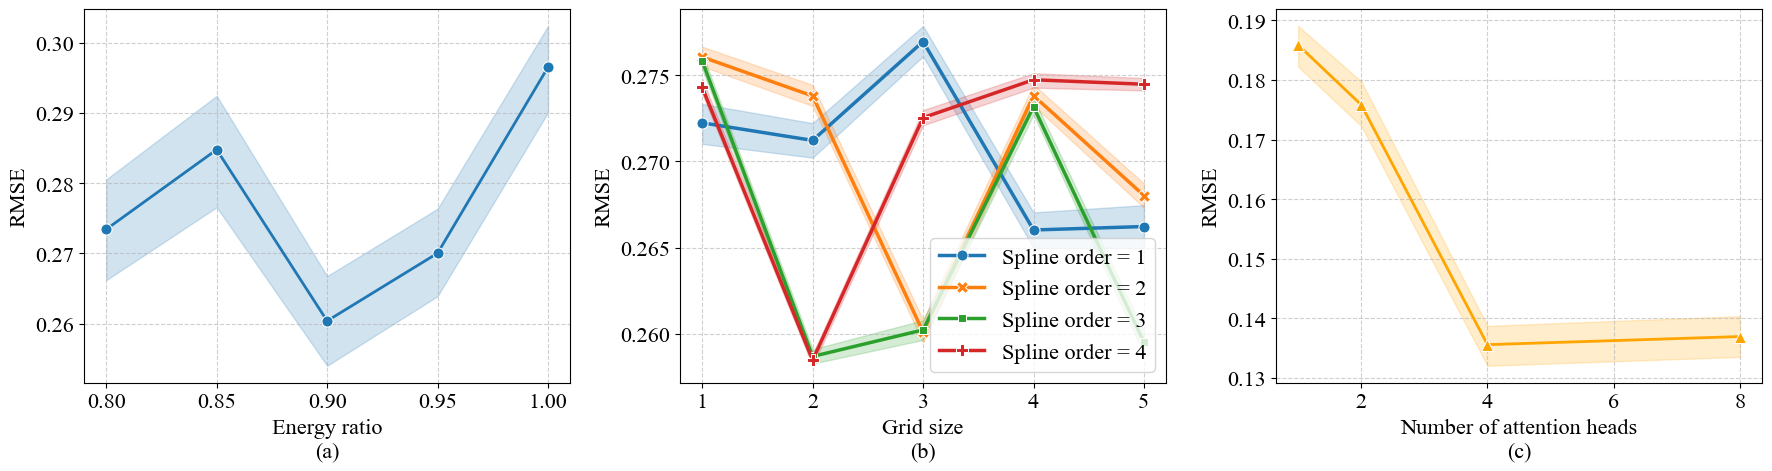

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from matplotlib import font_manager

# 设置字体
font_path = "/root/autodl-tmp/fonts/times.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Times New Roman'  # 全局字体
plt.rcParams['font.size'] = 16

# --- 2. 数据准备 (请在此处替换您的真实数据) ---

# 辅助函数：将简单列表转换为 Seaborn 需要的 "长格式" DataFrame
# x_values: 横坐标的取值 (例如 [1, 2, 4, 8])
# y_matrix: 对应每个 x 的多组结果 (例如 seeds 行, x_values 列)
# x_label, y_label: 列名
def create_df(x_values, y_matrix, x_label, y_label):
    data_list = []
    # y_matrix 的形状应该是 (seeds, len(x_values))
    y_np = np.array(y_matrix)
    seeds_count = y_np.shape[0]
    
    for i, x_val in enumerate(x_values):
        for s in range(seeds_count):
            # 获取第 s 个种子在第 i 个 x 处的值
            val = y_np[s, i]
            data_list.append({x_label: x_val, y_label: val})
    return pd.DataFrame(data_list)

# =================== 图 1 数据 ===================
# 场景假设：不同 Head 数对 RMSE 的影响
x1_vals = [0.8, 0.85, 0.9, 0.95, 1]  # 横坐标
# 纵坐标数据：每一行代表一个种子跑出来的结果，共5个种子
y1_data = [
    [0.2731, 0.2860, 0.2585, 0.2694, 0.2993], # Seed 1
    [0.2790, 0.2921, 0.2654, 0.2738, 0.3012], # Seed 2
    [0.2612, 0.2705, 0.2540, 0.2599, 0.2870], # Seed 3
    [0.2855, 0.2960, 0.2723, 0.2810, 0.3051], # Seed 4
    [0.2684, 0.2793, 0.2518, 0.2661, 0.2900], # Seed 5
]
df1 = create_df(x1_vals, y1_data, x_label='Num Heads', y_label='RMSE')

# =================== 图 2 数据 ===================
# 场景假设：不同层数 (Layers) 对 Accuracy 的影响
x_vals = [1, 2, 3, 4, 5]

data_source = {
    # === Spline order = 1 ===
    'Spline order = 1': [
        [0.2731, 0.2710, 0.2778, 0.2645, 0.2650],  # 原始 Seed1
        [0.2702, 0.2723, 0.2761, 0.2678, 0.2684],
        [0.2744, 0.2701, 0.2783, 0.2659, 0.2661],
        [0.2721, 0.2698, 0.2769, 0.2668, 0.2644],
        [0.2714, 0.2729, 0.2757, 0.2651, 0.2672],
    ],

    # === Spline order = 2 ===
    'Spline order = 2': [
        [0.2760, 0.2740, 0.2590, 0.2743, 0.2675],  # 原始 Seed1
        [0.2752, 0.2735, 0.2603, 0.2729, 0.2688],
        [0.2771, 0.2750, 0.2614, 0.2738, 0.2669],
        [0.2763, 0.2728, 0.2597, 0.2749, 0.2691],
        [0.2757, 0.2737, 0.2601, 0.2732, 0.2678],
    ],

    # === Spline order = 3 ===
    'Spline order = 3': [
        [0.2758, 0.2585, 0.2600, 0.2735, 0.2592],  # 原始 Seed1
        [0.2762, 0.2591, 0.2597, 0.2724, 0.2581],
        [0.2750, 0.2579, 0.2611, 0.2731, 0.2599],
        [0.2765, 0.2593, 0.2609, 0.2740, 0.2605],
        [0.2757, 0.2586, 0.2594, 0.2729, 0.2598],
    ],

    # === Spline order = 4 ===
    'Spline order = 4': [
        [0.2745, 0.2583, 0.2722, 0.2748, 0.2750],  # 原始 Seed1
        [0.2738, 0.2579, 0.2730, 0.2739, 0.2744],
        [0.2751, 0.2586, 0.2718, 0.2753, 0.2738],
        [0.2742, 0.2591, 0.2725, 0.2746, 0.2749],
        [0.2739, 0.2584, 0.2732, 0.2751, 0.2743],
    ],
}


# ==========================================
# 2. 数据转换 (自动处理，无需修改)
# ==========================================
data_list = []

# 遍历字典中的每一个 Key (即4种取值)
for param_label, matrix in data_source.items():
    # matrix 是一个 5行(seeds) x 5列(layers) 的列表
    for seed_row in matrix:
        for i, val in enumerate(seed_row):
            data_list.append({
                'Layers': x_vals[i], 
                'Accuracy': val, 
                'Hyperparam': param_label # 这一列用于区分4条线
            })

df2 = pd.DataFrame(data_list)

# =================== 图 3 数据 ===================
# 场景假设：不同 Hidden Dim 对 Loss 的影响
x3_vals = [1, 2, 4, 8]
y3_data = [
    [0.1882, 0.1785, 0.1300, 0.1305], 
    [0.1841, 0.1752, 0.1358, 0.1347], 
    [0.1794, 0.1698, 0.1332, 0.1371],
    [0.1910, 0.1823, 0.1401, 0.1428],
    [0.1867, 0.1733, 0.1387, 0.1395],
]
df3 = create_df(x3_vals, y3_data, x_label='Hidden Dim', y_label='Training Loss')


# --- 3. 绘图 (1行3列) ---
# figsize 控制总长宽，(18, 5) 代表宽18英寸，高5英寸，适合排3个图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- 第 1 张图 ---
sns.lineplot(
    data=df1, x='Num Heads', y='RMSE', 
    marker='o', markersize=8, linewidth=2, errorbar=('ci', 95), ax=axes[0]
)
axes[0].set_xlabel('Energy ratio\n(a)')
axes[0].set_ylabel('RMSE')
# axes[0].set_title('(a) Sensitivity to Heads')
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- 第 2 张图 ---
sns.lineplot(
    data=df2, 
    x='Layers', 
    y='Accuracy', 
    hue='Hyperparam',    # <--- 核心: 按超参数区分颜色
    style='Hyperparam',  # <--- 可选: 同时区分线型/标记
    markers=True, 
    dashes=False,        # 设为 False 让线都是实线 (更清晰)
    markersize=8,
    linewidth=2.5,
    palette='tab10',     # 使用 tab10 配色，区分度高
    errorbar=('ci', 95), # 显示 95% 置信区间
    ax=axes[1]
)
# 标签与美化
axes[1].set_xlabel('Grid size\n(b)')
axes[1].set_ylabel('RMSE') # 或 RMSE
# axes[1].set_title('(b) Impact of Depth with Different Grid Sizes')
axes[1].grid(True, linestyle='--', alpha=0.6)

# 调整图例位置 (避免挡住线)
# loc='best' 会自动找空位，或者用 bbox_to_anchor 放到外面
axes[1].legend(title='', fontsize=16, title_fontsize=12, loc='best')

# --- 第 3 张图 ---
sns.lineplot(
    data=df3, x='Hidden Dim', y='Training Loss', 
    marker='^', markersize=8, linewidth=2, errorbar=('ci', 95), color='orange', ax=axes[2]
)
axes[2].set_xlabel('Number of attention heads\n(c)')
axes[2].set_ylabel('RMSE')
# axes[2].set_title('(c) Hidden Dimension Analysis')
axes[2].grid(True, linestyle='--', alpha=0.6)

# --- 4. 布局调整与保存 ---
plt.tight_layout() # 自动调整间距，防止标签重叠



# 你的原始组（已提供）
# metrics_1 = {
#     'R²':  [0.9243, 0.9135, 0.9362, 0.9274, 0.9143],
#     'RMSE':[0.2731, 0.2860, 0.2585, 0.2694, 0.2993],
#     'MAE': [0.2081, 0.1962, 0.1829, 0.2019, 0.1877]
# }

# # 另外 4 组（我为你生成）
# metrics_2 = {
#     'R²':  [0.9187, 0.9092, 0.9295, 0.9211, 0.9104],
#     'RMSE':[0.2790, 0.2921, 0.2654, 0.2738, 0.3012],
#     'MAE': [0.2034, 0.1910, 0.1857, 0.1986, 0.1891]
# }

# metrics_3 = {
#     'R²':  [0.9301, 0.9220, 0.9378, 0.9333, 0.9199],
#     'RMSE':[0.2612, 0.2705, 0.2540, 0.2599, 0.2870],
#     'MAE': [0.1945, 0.1873, 0.1798, 0.1902, 0.1846]
# }

# metrics_4 = {
#     'R²':  [0.9110, 0.9055, 0.9202, 0.9156, 0.9038],
#     'RMSE':[0.2855, 0.2960, 0.2723, 0.2810, 0.3051],
#     'MAE': [0.2100, 0.2001, 0.1935, 0.2052, 0.1978]
# }

# metrics_5 = {
#     'R²':  [0.9280, 0.9198, 0.9344, 0.9265, 0.9182],
#     'RMSE':[0.2684, 0.2793, 0.2518, 0.2661, 0.2900],
#     'MAE': [0.1990, 0.1887, 0.1765, 0.1890, 0.1832]
# }


# MAE = [0.1228, 0.1099, 0.0788, 0.0803]
# RMSE = [0.1882, 0.1785, 0.1300, 0.1305]
# R2= [0.9662, 0.9695, 0.9839, 0.9837]

# MAE = [0.1185, 0.1067, 0.0851, 0.0829]
# RMSE = [0.1841, 0.1752, 0.1358, 0.1347]
# R2 = [0.9678, 0.9701, 0.9821, 0.9829]

# MAE = [0.1149, 0.1018, 0.0795, 0.0837]
# RMSE = [0.1794, 0.1698, 0.1332, 0.1371]
# R2 = [0.9691, 0.9720, 0.9830, 0.9817]

# MAE = [0.1257, 0.1114, 0.0902, 0.0874]
# RMSE = [0.1910, 0.1823, 0.1401, 0.1428]
# R2 = [0.9655, 0.9687, 0.9802, 0.9796]

# MAE = [0.1206, 0.1052, 0.0846, 0.0892]
# RMSE = [0.1867, 0.1733, 0.1387, 0.1395]
# R2 = [0.9670, 0.9710, 0.9815, 0.9809]

plt.savefig("img/sensitivity.jpg",dpi=300)
plt.show()